# Maximizing Revenvue for Taxi Cab Driveres Through Payment Type Analysis

## Problem Statement

In the fast-paced taxi booking sector, making the most Of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

# Objective

This project's main goal is to run an AIB test to examine the relationship between the total fare and the method of payment. We use Python hypothesis testing and
descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares
for those who pay with credit cards versus those who pay with cash.

# Research Question

Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers,
without negatively impacting customer experience?

## Importing Libraries 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

## Loading the Dataset

In [3]:
df = pd.read_csv('yellow_tripdata_2020-01.csv')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17800\3495846521.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('yellow_tripdata_2020-01.csv')


In [4]:
# Sample of Dataset
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [5]:
df.shape

(6405008, 18)

The Dataset which we are analysing have over 6 Millions Rows and 18 Columns, which is compariably huge from my all projects. the Size of the Dataset is 580 MB.

In [6]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [7]:
# Finding the Data Types of all columns
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [8]:
# Converting the columns to date time to find the timestamp b/w pickup and dropoff time.

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [9]:
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [10]:
# Calculation of Duration by subsracting the drop off and pick up time
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

In [11]:
df['duration']

0         0 days 00:04:48
1         0 days 00:07:25
2         0 days 00:06:11
3         0 days 00:04:51
4         0 days 00:02:18
                ...      
6405003   0 days 00:31:00
6405004   0 days 01:16:00
6405005   0 days 00:27:50
6405006   0 days 00:22:39
6405007   0 days 00:22:00
Name: duration, Length: 6405008, dtype: timedelta64[ns]

In [12]:
# Converting the Duration into Seconds, after to_datetime() function, 
# it will calculate the dates also.

df['duration'] = df['duration'].dt.total_seconds() / 60

In [13]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'duration'],
      dtype='object')

As the problem statement is revolving arround the payment type, passenger count and other factors which is selected below, we will filter the data a/c to it.

In [14]:
df = df[['passenger_count', 'payment_type', 'fare_amount','duration','trip_distance']]

In [15]:
df

,passenger_count,payment_type,fare_amount,duration,trip_distance
0,1.0,1.0,6.00,4.800000,1.20
1,1.0,1.0,7.00,7.416667,1.20
2,1.0,1.0,6.00,6.183333,0.60
3,1.0,1.0,5.50,4.850000,0.80
4,1.0,2.0,3.50,2.300000,0.00
...,...,...,...,...,...
6405003,NaN,NaN,17.59,31.000000,3.24
6405004,NaN,NaN,46.67,76.000000,22.13
6405005,NaN,NaN,48.85,27.833333,10.51
6405006,NaN,NaN,27.17,22.650000,5.49


In [16]:
# Checking the total missing values in every columns
df.isnull().sum()

passenger_count    65441
payment_type       65441
fare_amount            0
duration               0
trip_distance          0
dtype: int64

In [17]:
65441 / len(df) * 100

1.021716132126611

In [18]:
# As per the above calculation, there is just 1% data is missingm so,
# Droping all the missing values 
df.dropna(inplace = True)

In [19]:
df.shape

(6339567, 5)

In [20]:
# Finding some random samples
df.sample(5)

,passenger_count,payment_type,fare_amount,duration,trip_distance
5677238,1.0,1.0,3.5,1.983333,0.44
871000,1.0,1.0,7.0,7.100000,1.30
2309509,1.0,1.0,5.5,4.733333,0.80
2834915,1.0,1.0,52.0,46.916667,17.71
3402717,1.0,2.0,15.5,17.983333,4.15


In [21]:
# Converting both columns to integer type because it can't be in decimal

df['passenger_count'] = df['passenger_count'].astype('int64')

df['payment_type'] = df['payment_type'].astype('int64')

In [22]:
df.sample(5)

,passenger_count,payment_type,fare_amount,duration,trip_distance
3088769,1,1,5.0,4.166667,0.81
126835,1,2,15.5,18.966667,3.50
5490636,2,2,11.5,15.050000,2.21
611625,1,2,9.0,12.800000,1.09
3790532,1,1,4.5,2.266667,0.90


In [23]:
# Checking the duplicate values
# As per the cell output, there is 3 Millions of duplicated value which is
# the half of the Dataset shape

df[df.duplicated()]

,passenger_count,payment_type,fare_amount,duration,trip_distance
2056,1,2,7.0,0.000000,0.00
2441,1,1,52.0,0.200000,0.00
2446,2,1,9.5,13.066667,1.70
2465,1,1,4.0,3.083333,0.40
3344,1,1,6.0,5.350000,1.20
...,...,...,...,...,...
6339558,1,2,8.0,8.800000,1.63
6339559,1,1,8.5,8.016667,1.81
6339560,1,2,6.5,6.900000,0.98
6339562,1,1,11.0,14.233333,2.10


In [24]:
# Dropping the duplicated value, which will helpful to make better analysis
# and for better performance 

df.drop_duplicates(inplace = True)

In [25]:
df.shape

(3007861, 5)

The above DataFrame is useful for direct analysis, I just store for future predictions, I can direct access the Imp features

df.to_csv('Final_Taxi', index=False)

In [26]:
# Passenger Count Distribution from 0 passenger to 9 passengers

df['passenger_count'].value_counts(normalize = True)

1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: passenger_count, dtype: float64

1 = Credit Card
2 = Cash
3 = No Charge
4 = Dispute
5 = Unknown
6 = Voided Trip

As our analysis is going for Cash and Card Transactions, we can remove other payment type

In [27]:
# Payment count Distribution

df['payment_type'].value_counts(normalize = True)

1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: payment_type, dtype: float64

In [28]:
# a Trick to select the most Imp and Impactful Values for Analysis

df = df[(df['passenger_count'] > 0) & (df['passenger_count'] < 6)]

df = df[(df['payment_type'] < 3)]

In [29]:
# We just select the 1 and 2 which is Card and Cash
df['payment_type'].value_counts(normalize = True)

1    0.686189
2    0.313811
Name: payment_type, dtype: float64

In [30]:
df.shape

(2780283, 5)

In [31]:
# Renaming the Rows where Payment type is 1 and 2

df['payment_type'].replace([1, 2], ['Card', 'Cash'], inplace = True)

In [32]:
df.sample(5)

,passenger_count,payment_type,fare_amount,duration,trip_distance
1410873,1,Card,19.0,18.416667,5.50
288758,1,Card,4.5,2.383333,0.95
721609,1,Card,52.0,13.250000,9.29
2943908,2,Card,66.5,33.833333,17.60
6299869,1,Card,19.0,23.316667,4.83


In [33]:
# Describe() function is helpful to find the complete analysis of a DataFrame by just calling 1 function
# It will find the min, max, mean, std, QR1, QR3 etc.

# Descriptive Statistics for Data
df.describe()

,passenger_count,fare_amount,duration,trip_distance
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,2.415478e+01,4.536729e+00
std,1.176652e+00,1.506997e+01,9.260031e+01,4.895890e+00
min,1.000000e+00,-5.000000e+02,-2.770367e+03,-2.218000e+01
25%,1.000000e+00,9.000000e+00,9.883333e+00,1.500000e+00
50%,1.000000e+00,1.300000e+01,1.573333e+01,2.730000e+00
75%,2.000000e+00,2.100000e+01,2.336667e+01,5.470000e+00
max,5.000000e+00,4.265000e+03,8.525117e+03,2.628800e+02


Here we can see the minimum values of all the columns is Negative, which cannot be possible and can create problems for futher analysis, we need to eliminate these values.

Furthermore, the 50% values of columns is higher, which indicates the outliers in data. we need to remove to ensure the integrity of analysis.

In [34]:
# df.to_csv("Analysis.csv")

In [35]:
# Selecting the rows or values, which is greater than 0

df = df[df['fare_amount'] > 0]
df = df[df['trip_distance'] > 0]
df = df[df['duration'] > 0]

In [36]:
df.sample(5)

,passenger_count,payment_type,fare_amount,duration,trip_distance
130166,2,Card,6.0,5.400000,1.06
245698,2,Card,6.0,6.200000,0.95
2775874,2,Card,5.5,4.916667,0.64
223039,2,Cash,30.5,30.816667,9.00
565519,2,Card,10.5,14.466667,1.60


(array([2.748913e+06, 1.600000e+01, 1.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.000000e-02, 4.265090e+02, 8.530080e+02, 1.279507e+03,
        1.706006e+03, 2.132505e+03, 2.559004e+03, 2.985503e+03,
        3.412002e+03, 3.838501e+03, 4.265000e+03]),
 <BarContainer object of 10 artists>)

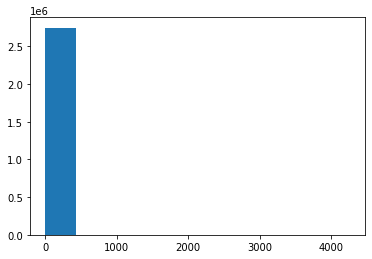

In [37]:
# checking the outlier using Histogram plot

plt.hist(df['fare_amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22db5704df0>,
 'caps': [<matplotlib.lines.Line2D at 0x22db5716490>,
 'boxes': [<matplotlib.lines.Line2D at 0x22db5704b20>],
 'medians': [<matplotlib.lines.Line2D at 0x22db5716970>],
 'fliers': [<matplotlib.lines.Line2D at 0x22db5716c40>],
 'means': []}

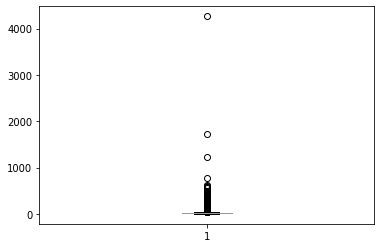

In [38]:
# Checking the outlier using Boxplot

plt.boxplot(df['fare_amount'])

In [39]:
# Code to remove Outlier using Interquartile Range for the Numerical Variables

for col in ['duration', 'trip_distance', 'fare_amount']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    
    IQR = q3 - q1
    
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower_bound) & (df[col] < upper_bound)]
    

We're interested on exploring the relationship between payment type and passenger behavior concerning trip distance and fare amount. Are there variations in the distribution Of payment types concerning different fare amounts or trip distances?

To investigate this, we'll plot histograms to visualize the distribution of passenger counts paying with either card or cash. This will also provide stakeholders with insight into fare amount ranges associated with different payment methods.

for col in ['duration', 'trip_distance', 'fare_amount']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    
    IQR = q3 - q1
    
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower_bound) & (df[col] < upper_bound)]

In [40]:
df.describe()

,passenger_count,fare_amount,duration,trip_distance
count,2.346912e+06,2.346912e+06,2.346912e+06,2.346912e+06
mean,1.781702e+00,1.296520e+01,1.491360e+01,2.971965e+00
std,1.207912e+00,6.097827e+00,7.564030e+00,2.114477e+00
min,1.000000e+00,1.000000e-02,1.666667e-02,1.000000e-02
25%,1.000000e+00,8.500000e+00,9.150000e+00,1.400000e+00
50%,1.000000e+00,1.200000e+01,1.413333e+01,2.380000e+00
75%,2.000000e+00,1.650000e+01,1.976667e+01,3.970000e+00
max,5.000000e+00,2.973000e+01,4.340000e+01,1.024000e+01


{'whiskers': [<matplotlib.lines.Line2D at 0x22db628c5b0>,
 'caps': [<matplotlib.lines.Line2D at 0x22db628cb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x22db628c2e0>],
 'medians': [<matplotlib.lines.Line2D at 0x22db629b130>],
 'fliers': [<matplotlib.lines.Line2D at 0x22db629b400>],
 'means': []}

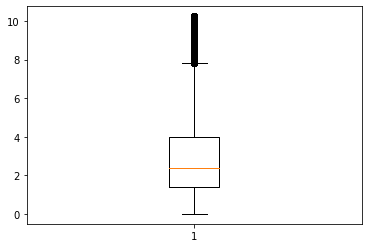

In [41]:
plt.boxplot(df['trip_distance'])

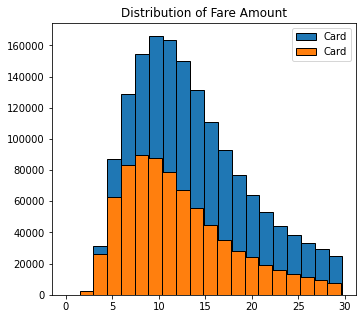

In [42]:
plt.figure(figsize = (12 , 5))

plt.subplot(1 , 2 , 1)

plt.title('Distribution of Fare Amount')

plt.hist(
    df[df['payment_type'] == 'Card']['fare_amount'], 
    histtype = 'barstacked', bins = 20, edgecolor = 'k', label = 'Card')

plt.hist(
    df[df['payment_type'] == 'Cash']['fare_amount'], 
    histtype = 'barstacked', bins = 20, edgecolor = 'k', label = 'Card')

plt.legend()
plt.show()

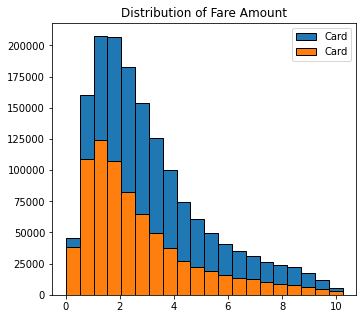

In [43]:
plt.figure(figsize = (12 , 5))

plt.subplot(1 , 2 , 1)

plt.title('Distribution of Fare Amount')

plt.hist(
    df[df['payment_type'] == 'Card']['trip_distance'], 
    histtype = 'barstacked', bins = 20, edgecolor = 'k', label = 'Card')

plt.hist(
    df[df['payment_type'] == 'Cash']['trip_distance'], 
    histtype = 'barstacked', bins = 20, edgecolor = 'k', label = 'Card')

plt.legend()
plt.show()

In [44]:
# Calculating the mean and standard deviation group by on payment type
df.groupby('payment_type').agg(
    {'fare_amount': ['mean', 'std'], 
     'trip_distance': ['mean', 'std']}
)

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           13.419043  6.134717      3.102582  2.129515
Cash           12.026027  5.911128      2.701670  2.056839

Now, in order to examine the passenger's preference regarding their choice of payment method, we will assess the proportion of the two payment types. To provide a visual representation, we have opted to utilize a pie chart. This graphical depiction will Offer a clear and intuitive understanding Of the distribution between the two payment methods chosen by passengers.

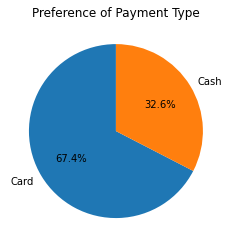

In [45]:
plt.title('Preference of Payment Type')

plt.pie(df['payment_type'].value_counts(normalize = True), labels = df['payment_type'].value_counts().index, startangle = 90, autopct = '%1.1f%%')

plt.show()

Subsequently, we aim to conduct an analysis Of the payment types in relation to the passenger count. Our objective is to investigate if there are any changes in preference contingent upon the number of passengers traveling in the cab.

To facilitate this examination, we have employed a visualization technique known as a stacked bar plot. This method is particularly advantageous for comparing the percentage distribution of each passenger count based on the payment method selected. Through this graphical representation, we can gain insights into potential variations in payment preferences across different passenger counts.

In [46]:
# Calculating the total passenger count distribution based on 
# the different payment type

df.groupby([
    'payment_type', 'passenger_count'
])[['passenger_count']].count()

passenger_count
payment_type passenger_count                 
Card         1                         935834
             2                         333000
             3                         123762
             4                          64295
             5                         125398
Cash         1                         470551
             2                         157787
             3                          55172
             4                          32999
             5                          48114

In [47]:
# Calculating the total passenger count distribution based on 
# the different payment type and storing in a new Data Frame

passenger_count = df.groupby([
    'payment_type', 'passenger_count'
])[['passenger_count']].count()

In [48]:
# Renaming the column from passenger count to Count

passenger_count.rename(
    columns = {
              'passenger_count' : 'count'
            }, inplace = True)

In [49]:
# Reset the Index, which is from 0
passenger_count.reset_index(inplace = True)

In [50]:
# Calculating the % distribution of each passenger count

passenger_count['perc'] = (
    passenger_count['count'] / passenger_count['count'].sum()
)*100

In [51]:
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,935834,39.875121
1,Card,2,333000,14.188858
2,Card,3,123762,5.273398
3,Card,4,64295,2.739557
4,Card,5,125398,5.343106
5,Cash,1,470551,20.049793
6,Cash,2,157787,6.723175
7,Cash,3,55172,2.350834
8,Cash,4,32999,1.406060
9,Cash,5,48114,2.050098


In [52]:
# Creating a New Data Frame 'pc' to store the distribution of
# each payment type 

pc = pd.DataFrame(columns = ['payment_type', 1,2,3,4,5])
pc['payment_type'] = ['Card', 'Cash']

In [53]:
# Appending the value in new DF

pc.iloc[0, 1:] = passenger_count.iloc[0:5, -1]

pc.iloc[1, 1:] = passenger_count.iloc[5:, -1]

In [54]:
# New Data Frame with Payment type and Passenger Count
pc

,payment_type,1,2,3,4,5
0,Card,39.875121,14.188858,5.273398,2.739557,5.343106
1,Cash,20.049793,6.723175,2.350834,1.40606,2.050098


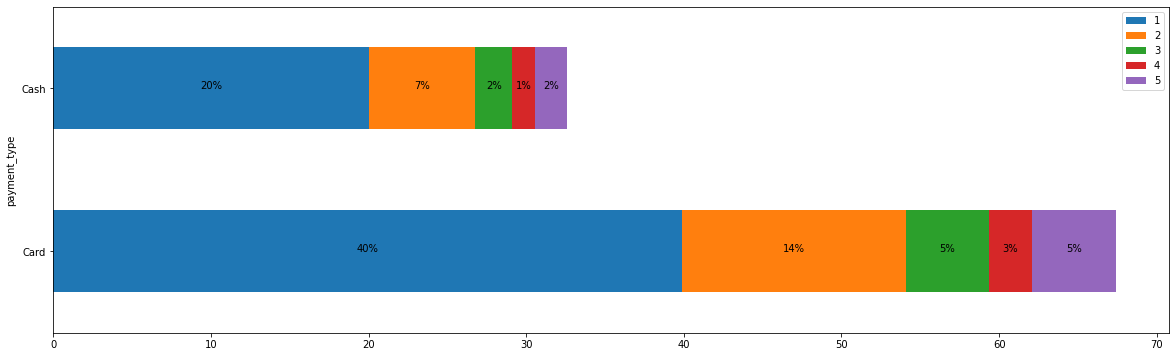

In [55]:
# Code to plot the Horizontal Bar Plot

fig, ax = plt.subplots(figsize = (20, 6))

pc.plot(x = 'payment_type', kind = 'barh', stacked = True, ax = ax)


for p in ax.patches:
    w = p.get_width()
    h = p.get_height()
    x, y = p.get_xy()
    
    ax.text(x + w / 2, y + h / 2,
            '{:.0f}%'.format(w),
            horizontalalignment= 'center')
#             verticatalignment= 'center' )

# Hypothesis Testing

In [56]:
# import seaborn as sns
# sns.qqplot(df['fare_amount'], line = '45')
# plt.show()

In order to select the most suitable test for our scenario, our initial step involves evaluating whether the distribution of fare amounts adheres to a normal distribution.
While the histogram depicted above suggests otherwise, we will further confirm this by generating a QQ plot.

Quantile-quantile (QQ) plots can be used to assess whether the fare amount distributions for each payment type are approximately normally distributed. If the datapoints closely align with the diagonal line in the plot, it suggests that the data follows a normal distribution.

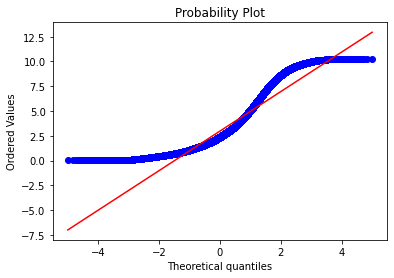

In [57]:
st.probplot(df['trip_distance'], dist = 'norm', plot = plt)
plt.show()

The data values clearly do not follow the red 45-degree line, which is an indication that they do not follow a normal distribution. so, z distribution will not be good for this. That's why we will use T test.

Given that the T-test can be applied to both small and large samples and does not require the population standard deviation, it is a more universally applicable approach for hypothesis testing in many practical research scenarios, including analyses of taxi trip data.

In the analysis of NYC Yellow Taxi Trip Records, where you're likely dealing with an unknown population standard deviation and potentially large datasets, the T-test offers a more appropriate and flexible method for comparing means between two groups (e.g., fare amounts by payment type). It provides a reliable way to infer about the population, accommodating the uncertainty that comes with estimating population parameters from sample data.

**Null hypothesis:** There is no difference in average fare between customers who use credit cards and customers who use cash.

**Alternative hypothesis:** There is a difference in average fare between customers who use credit cards and customers who use cash

In [58]:
# Sample 1
card_sample = df[df['payment_type'] == 'Card']['fare_amount']

# Sample 2
cash_sample = df[df['payment_type'] == 'Cash']['fare_amount']

In [59]:
# Performing t test on both samples
t_stats, p_val = st.ttest_ind(
    a = card_sample, b = cash_sample)
#     equal_val = False)

print(f't_stats {t_stats} and p_val {p_val}')

if p_val < 0.05:
    print("Reject the NULL Hypothesis")
    
else:
    print("Accept the NULL Hypothesis")

t_stats 164.96912273473026 and p_val 0.0
Reject the NULL Hypothesis


In [60]:
print(f't_stats {t_stats} and p_val {p_val}')

t_stats 164.96912273473026 and p_val 0.0


Since the p-value is significantly smaller than the significance level of 5%, we will reject the null hypothesis.

You conclude that there is a statistically significant difference in the average fare amount between customers who use credit cards and customers who use cash.

The key business insight is that encouraging customers to pay with credit cards can generate more revenue for taxi cab drivers.